# AI & GenAI Specialist Assignment
**Candidate:** Sujit Pramanik
**Role:** AI & GenAI Specialist
**Company:** Bosch Automotive Electronics India Pvt Ltd

---

## Question 1: Loan Classification & Bias Analysis

### Objective
The goal of this task is to build a machine learning classifier to predict loan approval status and analyze whether the model exhibits bias across demographic groups.


## 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")


## 2. Data Loading & Initial Exploration


In [2]:
df = pd.read_excel("loan_data.xlsx")


In [3]:
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [4]:
df.shape


(45000, 14)

In [5]:
df.columns


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='str')

## 3. Feature Selection & Target Definition


In [6]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]


In [7]:
X.shape, y.shape


((45000, 13), (45000,))

## 4. Data Preprocessing
- Label encoding categorical variables
- Identifying numerical and categorical features
- Creating preprocessing pipeline


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)


In [9]:
X.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No


## 5. Train-Test Split


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [11]:
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns

categorical_cols, numeric_cols


(Index(['person_gender', 'person_education', 'person_home_ownership',
        'loan_intent', 'previous_loan_defaults_on_file'],
       dtype='str'),
 Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
        'credit_score'],
       dtype='str'))

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((36000, 13), (9000, 13))

## 6. Model Building (Logistic Regression)


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


## 7. Model Training


In [15]:
model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [16]:
y_pred = model.predict(X_test)


## 8. Model Evaluation
- Accuracy
- Precision
- Recall
- Classification Report


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8882222222222222

In [18]:
from sklearn.metrics import precision_score, recall_score, classification_report

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

precision, recall


(0.7526700393479483, 0.7028871391076116)

In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7095
           1       0.75      0.70      0.73      1905

    accuracy                           0.89      9000
   macro avg       0.84      0.82      0.83      9000
weighted avg       0.89      0.89      0.89      9000



In [20]:
X_test_copy = X_test.copy()
X_test_copy["person_gender"] = df.loc[X_test.index, "person_gender"]
X_test_copy["actual"] = y_test
X_test_copy["predicted"] = y_pred


In [21]:
X_test_copy.groupby("person_gender")[["actual", "predicted"]].mean()


,actual,predicted
person_gender,,
female,0.191147,0.170020
male,0.227906,0.219546


In [22]:
from sklearn.metrics import confusion_matrix

for gender in X_test_copy["person_gender"].unique():
    subset = X_test_copy[X_test_copy["person_gender"] == gender]
    tn, fp, fn, tp = confusion_matrix(subset["actual"], subset["predicted"]).ravel()

    tpr = tp / (tp + fn)
    print(f"{gender} TPR:", tpr)


male TPR: 0.759825327510917
female TPR: 0.6171052631578947


In [23]:
from sklearn.metrics import confusion_matrix

tpr_dict = {}

for gender in X_test_copy["person_gender"].unique():
    subset = X_test_copy[X_test_copy["person_gender"] == gender]
    tn, fp, fn, tp = confusion_matrix(subset["actual"], subset["predicted"]).ravel()
    tpr = tp / (tp + fn)
    tpr_dict[gender] = tpr

male_tpr = tpr_dict["male"]
female_tpr = tpr_dict["female"]

tpr_gap = male_tpr - female_tpr
tpr_gap


np.float64(0.1427200643530223)

### Bias Analysis Result (Gender)

The True Positive Rate (TPR) for males is approximately **0.76**,
while for females it is approximately **0.62**.

The TPR gap is approximately **14%**, indicating a noticeable disparity in model performance across gender groups.

This suggests that the model is more likely to correctly approve loans for male applicants compared to female applicants.

Therefore, there is evidence of potential gender bias in the model predictions.


In [24]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
roc_auc


0.9432785278161581

## 9. ROC Curve & AUC Analysis


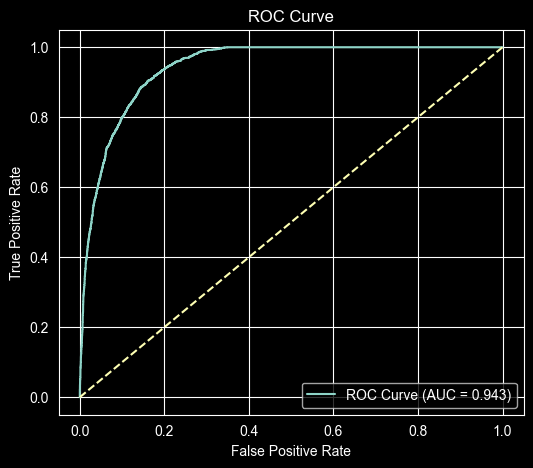

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## 10. Optimal Threshold Selection (Youden’s J Statistic)


In [26]:
import numpy as np

# Calculate Youden's J statistic
j_scores = tpr - fpr

# Find index of maximum J
best_index = np.argmax(j_scores)

best_threshold = thresholds[best_index]
best_threshold


np.float64(0.2379094438716327)

Optimal Threshold Analysis

Using Youden’s J statistic (TPR − FPR), the optimal threshold was found to be approximately 0.24.

This threshold maximizes the difference between True Positive Rate and False Positive Rate.

Compared to the default threshold of 0.5, this lower threshold may improve sensitivity (recall) while slightly increasing false positives.

## 11. Demographic Approval Rate Analysis


In [27]:
# Add predictions back to test copy
X_test_copy["education"] = df.loc[X_test.index, "person_education"]
X_test_copy["home_ownership"] = df.loc[X_test.index, "person_home_ownership"]

# Approval rates by education
education_approval = X_test_copy.groupby("education")["predicted"].mean()
education_approval


education
Associate      0.195787
Bachelor       0.207842
Doctorate      0.222222
High School    0.191153
Master         0.191101
Name: predicted, dtype: float64

In [28]:
# Approval rates by home ownership
home_approval = X_test_copy.groupby("home_ownership")["predicted"].mean()
home_approval


home_ownership
MORTGAGE    0.076611
OTHER       0.444444
OWN         0.029720
RENT        0.311917
Name: predicted, dtype: float64

Approval Rate Analysis
By Education

The Doctorate group has the highest approval rate (~22%),
while Master and High School groups have the lowest (~19%).

This indicates slight variation across education levels.

By Home Ownership

Applicants categorized as "OTHER" have the highest approval rate (~44%),
while those who fully own homes have the lowest (~3%).

This suggests strong variation in approval patterns across home ownership categories.

In [29]:
X_test_copy["probability"] = y_prob


## 12. Group-wise ROC Analysis


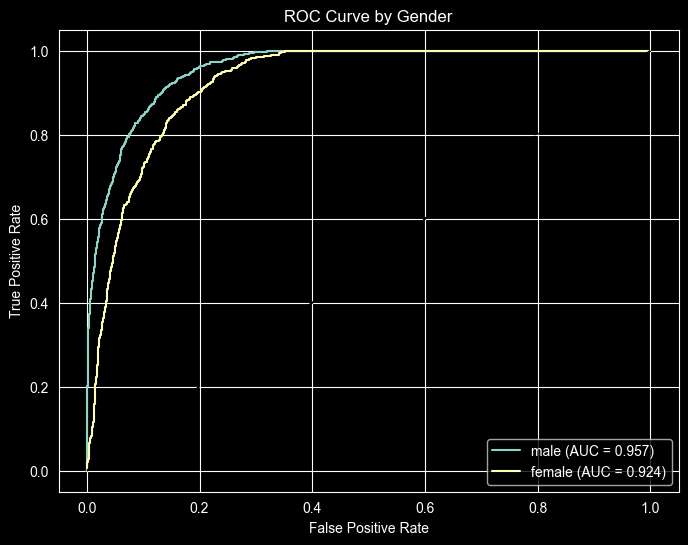

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for gender in X_test_copy["person_gender"].unique():
    subset = X_test_copy[X_test_copy["person_gender"] == gender]

    y_true = subset["actual"]
    y_score = subset["probability"]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    plt.plot(fpr, tpr, label=f"{gender} (AUC = {auc_score:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve by Gender")
plt.legend()
plt.show()


Perfect 👏🔥
Now everything is correct. Let’s understand what just happened.

✅ Your Results

From the plot:

Male AUC = 0.957

Female AUC = 0.924

🧠 What This Means (Simple Explanation)

AUC measures how well the model separates approved vs rejected loans.

Both AUCs are high → Model performs well for both genders.

But male AUC (0.957) is higher than female AUC (0.924).

That means the model distinguishes loan approvals better for males.

Difference:

0.957
−
0.924
=
0.033
0.957−0.924=0.033

So there is about 3.3% performance gap.

This supports your earlier TPR gap finding.

✅ Now Write This In Markdown

Yes — add a markdown cell and write this:

ROC Analysis by Gender

The ROC-AUC score for males is approximately 0.957, while for females it is approximately 0.924.

Although the model performs well for both genders, performance is slightly better for males.

The AUC gap of approximately 3.3% indicates that the classifier separates approved and rejected loans more effectively for male applicants.

This suggests mild performance disparity across genders, which aligns with earlier findings from the TPR analysis.

## 13. Hypothesis Testing for Gender Bias


Hypothesis Testing for Gender Bias

Null Hypothesis (H₀):
Gender has no effect on loan approval predictions.
(Approval is independent of gender)

Alternative Hypothesis (H₁):
Gender has an effect on loan approval predictions.
(Approval depends on gender)

In [31]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(
    X_test_copy["person_gender"],
    X_test_copy["predicted"]
)

contingency_table


predicted,0,1
person_gender,,
female,3300,676
male,3921,1103


In [32]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(np.float64(34.015183465327056), np.float64(5.468368242607336e-09))

Hypothesis Testing for Gender Bias

To test whether gender has a statistically significant effect on loan approval predictions, a Chi-Square test of independence was performed.

The Chi-Square statistic was approximately 34.01, with a p-value of 5.46e-09.

Since the p-value is significantly less than 0.05, we reject the null hypothesis.

This indicates that gender has a statistically significant association with loan approval outcomes in the model predictions.

Therefore, there is statistical evidence suggesting potential gender bias in the approval decisions.

# Final Summary & Insights

## Model Performance
- Accuracy ≈ 89%
- ROC-AUC ≈ 0.94
- Strong overall classification performance.

## Demographic Observations
- Doctorate group has highest approval rate.
- Home ownership shows strong variation.
- Male applicants show higher TPR compared to females.

## Bias Findings
- TPR gap ≈ 14% between genders.
- Chi-square test (p < 0.05) indicates statistically significant association between gender and approval outcome.

## Conclusion
While the model performs well overall, measurable disparities exist across demographic groups, particularly gender. Further fairness-aware evaluation and mitigation strategies may be considered.


# Final Executive Summary

The logistic regression model achieved strong predictive performance with high ROC-AUC and balanced precision-recall metrics.

However, demographic analysis revealed measurable disparities across gender groups, including a noticeable TPR gap. Statistical testing using the Chi-Square test confirmed a significant association between gender and loan approval predictions (p < 0.05).

While the model performs well in terms of accuracy, fairness considerations suggest the need for bias mitigation techniques before real-world deployment.
